In [2]:
import numpy as np
import xarray as xr
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [3]:
## Where are we working
proj_dir = '/Users/zstanley/Documents/git_repos/obs_loc_for_scda'
plot_dir = proj_dir + '/plots/20151206.030000'
my_data_dir = proj_dir + '/my_data/20151206.030000'
nb_dir = proj_dir + '/notebooks'

In [4]:
cd /Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts

/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts


In [5]:
from post_processing_fns import *

In [6]:
## Which vertical columns are we considering here?
which_columns = {
  'lons' : [-174.5, 45.5, 75.5, -129.5, 160.5],
  'lats' : [-29.5, -59.5, -24.5, 0.5, 40.5],
  'name' : ['South Pacific', 'Southern Ocean', 'Indian Ocean', 'Tropical Pacific', 'North Pacific'],
  'save_name' : ['south_pacific', 'southern_ocean', 'indian_ocean', 'tropical_pacific', 'north_pacific']
}
which_columns2 = {
  'lons' : [-154.5, 35.5, 75.5, -150.5, 160.5],
  'lats' : [-27.5, -49.5, -31.5, 12.5, 40.5],
  'name' : ['South Pacific', 'Southern Ocean', 'Indian Ocean', 'Tropical Pacific', 'North Pacific'],
  'save_name' : ['south_pacific2', 'southern_ocean2', 'indian_ocean2', 'tropical_pacific2', 'north_pacific2']
}
sergey_columns = {
  'lons' : [-150.0, 160.0, 75.0,  -110.0],
  'lats' : [3.0,    40.0,  -24.0, -30.0],
  'name' : ['Tropical East Pacific', 'Kuroshio', 'Indian Ocean', 'South Pacific'],
  'save_name' : ['tepac', 'kuroshio', 'io', 'spac']
}

In [7]:
sst_ast_corr = xr.open_dataset(my_data_dir+'/sst_ast_corr.nc')

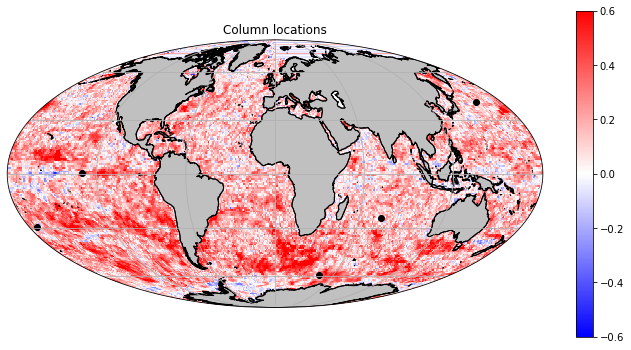

In [9]:
## Save a map of the world showing column locations
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_global()
im = ax.pcolormesh(sst_ast_corr['lon'], sst_ast_corr['lat'], sst_ast_corr['__xarray_dataarray_variable__'], vmin=-0.6, vmax=0.6, cmap='bwr', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='silver'))
plt.colorbar(im)
plt.title('Column locations')
ax.coastlines(resolution='110m')
ax.gridlines()
ax.scatter(which_columns2['lons'], which_columns2['lats'], c='k',transform=ccrs.PlateCarree())

plt.rcParams['figure.figsize'] = [12,6]
plt.savefig(plot_dir+'/sst_ast_corr_with_column_locations.png')
plt.show()

In [10]:
## Load vertical columns
south_pacific = xr.open_dataset(my_data_dir+'/five_columns_south_pacific2.nc')
southern_ocean = xr.open_dataset(my_data_dir+'/five_columns_southern_ocean2.nc')
indian_ocean = xr.open_dataset(my_data_dir+'/five_columns_indian_ocean2.nc')
tropical_pacific = xr.open_dataset(my_data_dir+'/five_columns_tropical_pacific2.nc')
north_pacific = xr.open_dataset(my_data_dir+'/five_columns_north_pacific.nc')

In [11]:
## South Pacific
sp_corr = xr.Dataset()
sp_corr['sst_atm_T'] = xr.corr(south_pacific['sst'], south_pacific['atm_T'], dim = 'ens_mem')
sp_corr['sst_ocn_T'] = xr.corr(south_pacific['sst'], south_pacific['ocn_Temp'], dim = 'ens_mem')
sp_corr['atm_p'] = south_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
sp_corr = sp_corr.mean(['lat', 'lon'])

## Southern Ocean
so_corr = xr.Dataset()
so_corr['sst_atm_T'] = xr.corr(southern_ocean['sst'], southern_ocean['atm_T'], dim = 'ens_mem')
so_corr['sst_ocn_T'] = xr.corr(southern_ocean['sst'], southern_ocean['ocn_Temp'], dim = 'ens_mem')
so_corr['atm_p'] = southern_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
so_corr = so_corr.mean(['lat', 'lon'])

## Indian Ocean
io_corr = xr.Dataset()
io_corr['sst_atm_T'] = xr.corr(indian_ocean['sst'], indian_ocean['atm_T'], dim = 'ens_mem')
io_corr['sst_ocn_T'] = xr.corr(indian_ocean['sst'], indian_ocean['ocn_Temp'], dim = 'ens_mem')
io_corr['atm_p'] = indian_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
io_corr = io_corr.mean(['lat', 'lon'])

## Tropical Pacific
tp_corr = xr.Dataset()
tp_corr['sst_atm_T'] = xr.corr(tropical_pacific['sst'], tropical_pacific['atm_T'], dim = 'ens_mem')
tp_corr['sst_ocn_T'] = xr.corr(tropical_pacific['sst'], tropical_pacific['ocn_Temp'], dim = 'ens_mem')
tp_corr['atm_p'] = tropical_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
tp_corr = tp_corr.mean(['lat', 'lon'])

## North Pacific
np_corr = xr.Dataset()
np_corr['sst_atm_T'] = xr.corr(north_pacific['sst'], north_pacific['atm_T'], dim = 'ens_mem')
np_corr['sst_ocn_T'] = xr.corr(north_pacific['sst'], north_pacific['ocn_Temp'], dim = 'ens_mem')
np_corr['atm_p'] = north_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
np_corr = np_corr.mean(['lat', 'lon'])

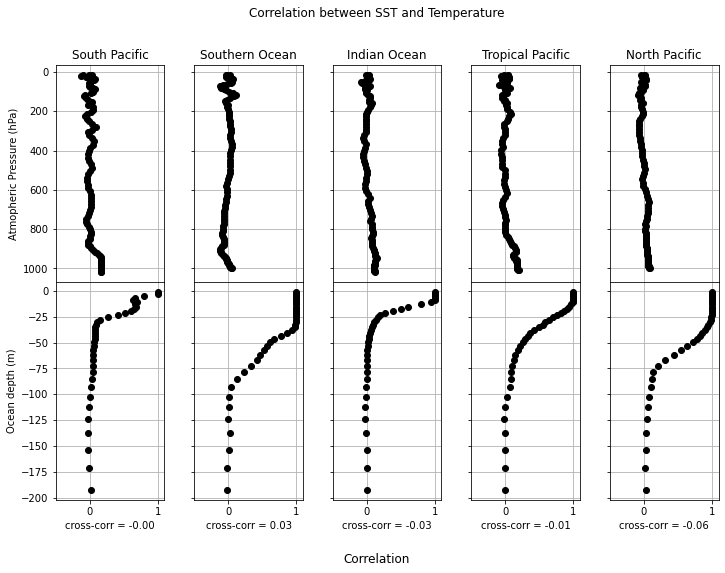

In [13]:
## Create subplots
fig, axs = plt.subplots(nrows=2, ncols=5, sharex=True, sharey='row') 

# Plot atm correlations
axs[0, 0].plot(sp_corr['sst_atm_T'][23:], sp_corr['atm_p'][23:], 'ko')
axs[0, 1].plot(so_corr['sst_atm_T'][23:], so_corr['atm_p'][23:], 'ko')
axs[0, 2].plot(io_corr['sst_atm_T'][23:], io_corr['atm_p'][23:], 'ko')
axs[0, 3].plot(tp_corr['sst_atm_T'][23:], tp_corr['atm_p'][23:], 'ko')
axs[0, 4].plot(np_corr['sst_atm_T'][23:], np_corr['atm_p'][23:], 'ko')

# Plot ocn correlations
axs[1, 0].plot(sp_corr['sst_ocn_T'][:37], -1 * sp_corr['ocn_lev'][:37], 'ko')
axs[1, 1].plot(so_corr['sst_ocn_T'][:37], -1 * so_corr['ocn_lev'][:37], 'ko')
axs[1, 2].plot(io_corr['sst_ocn_T'][:37], -1 * io_corr['ocn_lev'][:37], 'ko')
axs[1, 3].plot(tp_corr['sst_ocn_T'][:37], -1 * tp_corr['ocn_lev'][:37], 'ko')
axs[1, 4].plot(np_corr['sst_ocn_T'][:37], -1 * np_corr['ocn_lev'][:37], 'ko')

# Set titles
axs[0,0].set_title('South Pacific')
axs[0,1].set_title('Southern Ocean')
axs[0,2].set_title('Indian Ocean')
axs[0,3].set_title('Tropical Pacific')
axs[0,4].set_title('North Pacific')

# Add correlation
axs[1,0].set_xlabel('cross-corr = '+str('%.2f'%sp_corr['sst_atm_T'][63].values))
axs[1,1].set_xlabel('cross-corr = '+str('%.2f'%so_corr['sst_atm_T'][63].values))
axs[1,2].set_xlabel('cross-corr = '+str('%.2f'%io_corr['sst_atm_T'][63].values))
axs[1,3].set_xlabel('cross-corr = '+str('%.2f'%tp_corr['sst_atm_T'][63].values))
axs[1,4].set_xlabel('cross-corr = '+str('%.2f'%np_corr['sst_atm_T'][63].values))

# Adjust axes
axs[0, 0].invert_yaxis()
#axs[0, 0].set_yscale('log')
#axs[1, 0].set_yscale('symlog')

# Adjust and label axes
axs[0, 0].set_xlim([-0.5, 1.1])
axs[0, 0].set_ylabel('Atmopheric Pressure (hPa)')
axs[1, 0].set_ylabel('Ocean depth (m)')
fig.supxlabel('Correlation')
fig.suptitle('Correlation between SST and Temperature')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(2)

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/sst_temp_corr_five_columns')
plt.show()

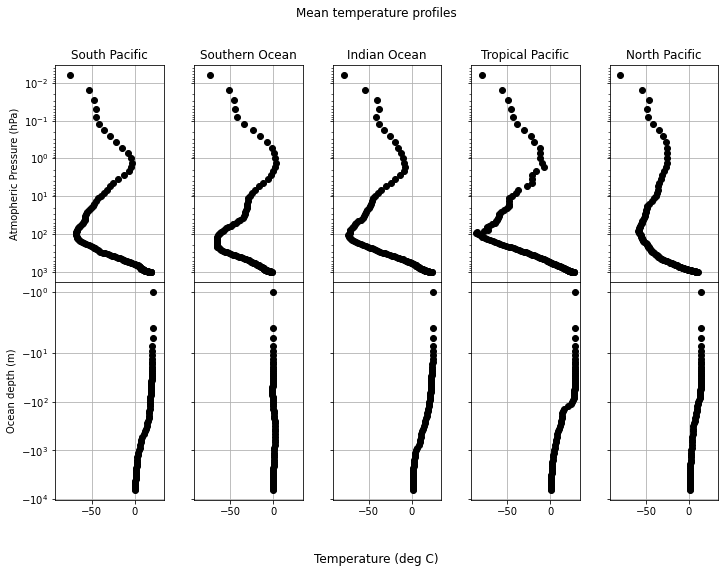

In [14]:
## Create subplots
fig, axs = plt.subplots(nrows=2, ncols=5, sharex=True, sharey='row') 

# Plot atm temperature
axs[0, 0].plot(south_pacific['atm_T'].mean(['lat', 'lon', 'ens_mem'])-273.15, sp_corr['atm_p'], 'ko')
axs[0, 1].plot(southern_ocean['atm_T'].mean(['lat', 'lon', 'ens_mem'])-273.15, so_corr['atm_p'], 'ko')
axs[0, 2].plot(indian_ocean['atm_T'].mean(['lat', 'lon', 'ens_mem'])-273.15, io_corr['atm_p'], 'ko')
axs[0, 3].plot(tropical_pacific['atm_T'].mean(['lat', 'lon', 'ens_mem'])-273.15, tp_corr['atm_p'], 'ko')
axs[0, 4].plot(north_pacific['atm_T'].mean(['lat', 'lon', 'ens_mem'])-273.15, np_corr['atm_p'], 'ko')

# Plot ocn temperature
axs[1, 0].plot(south_pacific['ocn_Temp'].mean(['lat', 'lon', 'ens_mem']), -1 * sp_corr['ocn_lev'], 'ko')
axs[1, 1].plot(southern_ocean['ocn_Temp'].mean(['lat', 'lon', 'ens_mem']), -1 * so_corr['ocn_lev'], 'ko')
axs[1, 2].plot(indian_ocean['ocn_Temp'].mean(['lat', 'lon', 'ens_mem']), -1 * io_corr['ocn_lev'], 'ko')
axs[1, 3].plot(tropical_pacific['ocn_Temp'].mean(['lat', 'lon', 'ens_mem']), -1 * tp_corr['ocn_lev'], 'ko')
axs[1, 4].plot(north_pacific['ocn_Temp'].mean(['lat', 'lon', 'ens_mem']), -1 * np_corr['ocn_lev'], 'ko')

# Set titles
axs[0,0].set_title('South Pacific')
axs[0,1].set_title('Southern Ocean')
axs[0,2].set_title('Indian Ocean')
axs[0,3].set_title('Tropical Pacific')
axs[0,4].set_title('North Pacific')

# Adjust axes
axs[0, 0].invert_yaxis()
axs[0, 0].set_yscale('log')
axs[1, 0].set_yscale('symlog')

# Adjust and label axes
#axs[0, 0].set_xlim([-0.5, 1.1])
axs[0, 0].set_ylabel('Atmopheric Pressure (hPa)')
axs[1, 0].set_ylabel('Ocean depth (m)')
fig.supxlabel('Temperature (deg C)')
fig.suptitle('Mean temperature profiles')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(2)

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/temp_mean_atm_ocn_five_columns')
plt.show()

In [15]:
## Plot vertical profiles in top 150 m of ocean
## Average over ensemble members and show the mean at each location only

# South Pacific
sp_temp = south_pacific['ocn_Temp'].mean('ens_mem').to_numpy()
sp_temp = sp_temp.reshape(75, 25)

# Southern Ocean
so_temp = southern_ocean['ocn_Temp'].mean('ens_mem').to_numpy()
so_temp = so_temp.reshape(75, 25)

# Indian Ocean
io_temp = indian_ocean['ocn_Temp'].mean('ens_mem').to_numpy()
io_temp = io_temp.reshape(75, 25)

# Tropical Pacific
tp_temp = tropical_pacific['ocn_Temp'].mean('ens_mem').to_numpy()
tp_temp = tp_temp.reshape(75, 25)

# North Pacific
np_temp = north_pacific['ocn_Temp'].mean('ens_mem').to_numpy()
np_temp = np_temp.reshape(75, 25)

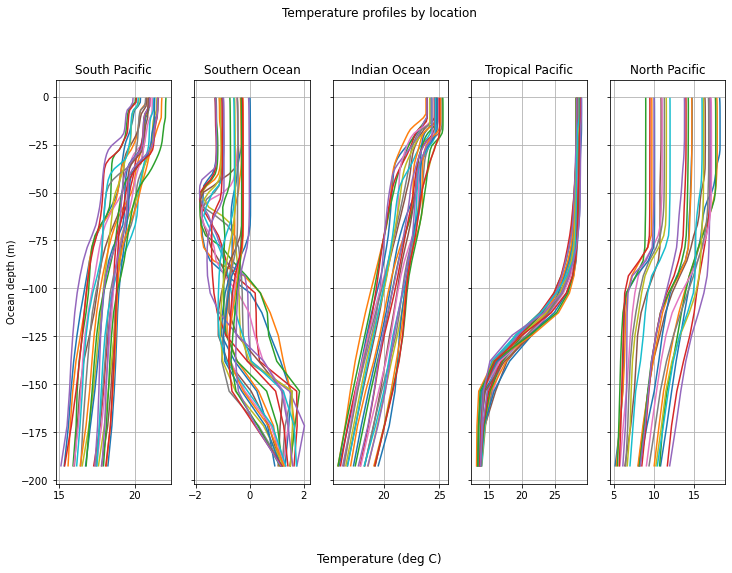

In [16]:
## Create subplots
fig, axs = plt.subplots(ncols=5, sharey=True) 

# Plot ocn temperature
ind150m =  37
axs[0].plot(sp_temp[:ind150m], -1 * sp_corr['ocn_lev'][:ind150m])
axs[1].plot(so_temp[:ind150m], -1 * so_corr['ocn_lev'][:ind150m])
axs[2].plot(io_temp[:ind150m], -1 * io_corr['ocn_lev'][:ind150m])
axs[3].plot(tp_temp[:ind150m], -1 * tp_corr['ocn_lev'][:ind150m])
axs[4].plot(np_temp[:ind150m], -1 * np_corr['ocn_lev'][:ind150m])

# Set titles
axs[0].set_title('South Pacific')
axs[1].set_title('Southern Ocean')
axs[2].set_title('Indian Ocean')
axs[3].set_title('Tropical Pacific')
axs[4].set_title('North Pacific')

# Adjust and label axes
axs[0].set_ylabel('Ocean depth (m)')
fig.supxlabel('Temperature (deg C)')
fig.suptitle('Temperature profiles by location')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(3.5)

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/temp_mean_ocn150m_five_columns')
plt.show()

In [17]:
## Plot spread in top 150 m of ocean
## Standard deviation of ensemble

# South Pacific
sp_temp_std = south_pacific['ocn_Temp'].std('ens_mem').to_numpy()
sp_temp_std = sp_temp_std.reshape(75, 25)

# Southern Ocean
so_temp_std = southern_ocean['ocn_Temp'].std('ens_mem').to_numpy()
so_temp_std = so_temp_std.reshape(75, 25)

# Indian Ocean
io_temp_std = indian_ocean['ocn_Temp'].std('ens_mem').to_numpy()
io_temp_std = io_temp_std.reshape(75, 25)

# Tropical Pacific
tp_temp_std = tropical_pacific['ocn_Temp'].std('ens_mem').to_numpy()
tp_temp_std = tp_temp_std.reshape(75, 25)

# North Pacific
np_temp_std = north_pacific['ocn_Temp'].std('ens_mem').to_numpy()
np_temp_std = np_temp_std.reshape(75, 25)

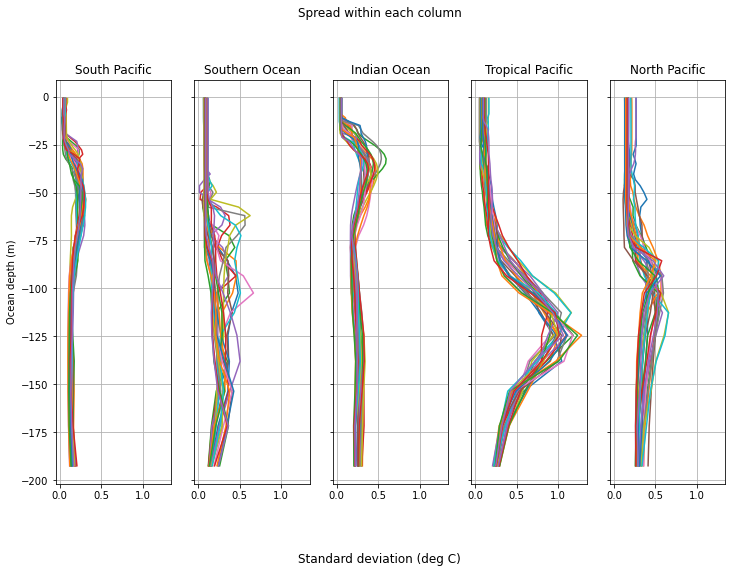

In [18]:
## Create subplots
fig, axs = plt.subplots(ncols=5, sharey=True, sharex=True) 

# Plot ocn temperature
ind150m =  37
axs[0].plot(sp_temp_std[:ind150m], -1 * sp_corr['ocn_lev'][:ind150m])
axs[1].plot(so_temp_std[:ind150m], -1 * so_corr['ocn_lev'][:ind150m])
axs[2].plot(io_temp_std[:ind150m], -1 * io_corr['ocn_lev'][:ind150m])
axs[3].plot(tp_temp_std[:ind150m], -1 * tp_corr['ocn_lev'][:ind150m])
axs[4].plot(np_temp_std[:ind150m], -1 * np_corr['ocn_lev'][:ind150m])

# Set titles
axs[0].set_title('South Pacific')
axs[1].set_title('Southern Ocean')
axs[2].set_title('Indian Ocean')
axs[3].set_title('Tropical Pacific')
axs[4].set_title('North Pacific')

# Adjust and label axes
axs[0].set_ylabel('Ocean depth (m)')
fig.supxlabel('Standard deviation (deg C)')
fig.suptitle('Spread within each column')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(3.5)

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/temp_std_bycolumn_ocn150m_five_columns')
plt.show()

In [19]:
# Spread in the mean profiles
sp_stdofmean = sp_temp.std(axis=1)
so_stdofmean = so_temp.std(axis=1)
io_stdofmean = io_temp.std(axis=1)
tp_stdofmean = tp_temp.std(axis=1)
np_stdofmean = np_temp.std(axis=1)

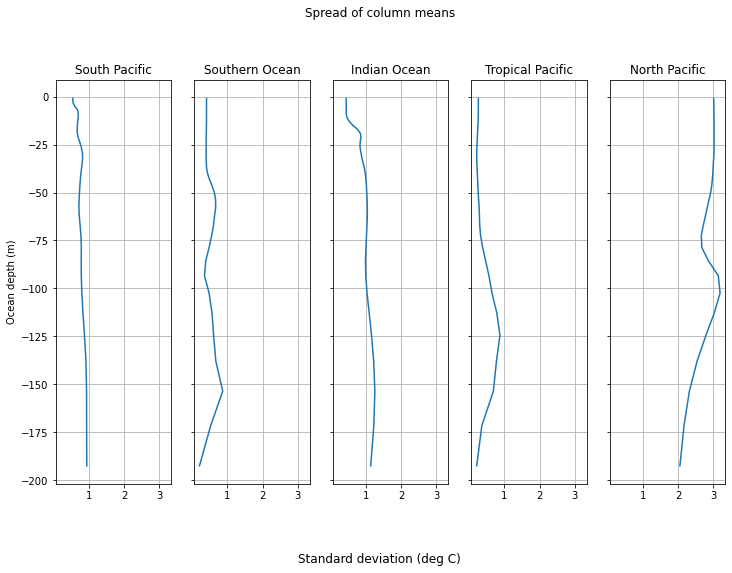

In [20]:
## Create subplots
fig, axs = plt.subplots(ncols=5, sharey=True, sharex=True) 

# Plot ocn temperature
ind150m =  37
axs[0].plot(sp_stdofmean[:ind150m], -1 * sp_corr['ocn_lev'][:ind150m])
axs[1].plot(so_stdofmean[:ind150m], -1 * so_corr['ocn_lev'][:ind150m])
axs[2].plot(io_stdofmean[:ind150m], -1 * io_corr['ocn_lev'][:ind150m])
axs[3].plot(tp_stdofmean[:ind150m], -1 * tp_corr['ocn_lev'][:ind150m])
axs[4].plot(np_stdofmean[:ind150m], -1 * np_corr['ocn_lev'][:ind150m])

# Set titles
axs[0].set_title('South Pacific')
axs[1].set_title('Southern Ocean')
axs[2].set_title('Indian Ocean')
axs[3].set_title('Tropical Pacific')
axs[4].set_title('North Pacific')

# Adjust and label axes
axs[0].set_ylabel('Ocean depth (m)')
fig.supxlabel('Standard deviation (deg C)')
fig.suptitle('Spread of column means')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(3.5)

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/temp_stdofmean_ocn150m_five_columns')
plt.show()

In [21]:
## Convert dataset to numpy array in an ugly loop
# which location
ds = north_pacific
name = 'north_pacific'

num_atm_lev = len(ds['atm_lev'])
num_ocn_lev = len(ds['ocn_lev'])
num_tot_lev =  num_atm_lev + num_ocn_lev
num_ens_mem = len(ds['ens_mem'])
num_bs_ens_mem = num_ens_mem * 25
ds_manual = np.empty((num_tot_lev, num_bs_ens_mem))
start = 0
end = num_ens_mem
for lon in ds['lon'].values:
  for lat in ds['lat'].values:
    # Select atm columns
    ds_atm = ds['atm_T'].sel(lon=lon, lat=lat)
    ds_atm_np = ds_atm.to_numpy()
    ds_atm_np = np.swapaxes(ds_atm_np, 0, 1)
    ens_atm_avg = ds_atm_np.mean(axis=1)
    ens_atm_avg_expand = np.tile(ens_atm_avg, (num_ens_mem,1)).transpose()
    # Select ocn columns
    ds_ocn = ds['ocn_Temp'].sel(lon=lon, lat=lat, method='nearest')
    ds_ocn_np = ds_ocn.to_numpy()
    ds_ocn_np = np.swapaxes(ds_ocn_np, 0, 1)
    ens_ocn_avg = ds_ocn_np.mean(axis=1)
    ens_ocn_avg_expand = np.tile(ens_ocn_avg, (num_ens_mem,1)).transpose()
    # Store atm and ocn columns
    ds_manual[:num_atm_lev , start:end] = ds_atm_np - ens_atm_avg_expand
    ds_manual[num_atm_lev:num_tot_lev , start:end] = ds_ocn_np - ens_ocn_avg_expand
    start = start + num_ens_mem
    end = end + num_ens_mem

## Compute covariance matrix
cov_temp = np.cov(ds_manual)
cor_temp = np.corrcoef(ds_manual)

## Save covariance and correlation matrices
np.save(my_data_dir+'/'+name+'_cov.npy', cov_temp)
np.save(my_data_dir+'/'+name+'_cor.npy', cor_temp)

/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated

In [22]:
# Load covariance matrices
sp_cov = np.load(my_data_dir +'/south_pacific2_cov.npy')
so_cov = np.load(my_data_dir +'/southern_ocean2_cov.npy')
io_cov = np.load(my_data_dir +'/indian_ocean2_cov.npy')
tp_cov = np.load(my_data_dir +'/tropical_pacific2_cov.npy')
np_cov = np.load(my_data_dir +'/north_pacific_cov.npy')

In [ ]:
# Plot covariance matrices
this_cov = sp_cov
fullname = 'South Pacific'
short_name = 'south_pacific'
plt.imshow(this_cov)
plt.colorbar()
plt.title('Atmospheric and Oceanic Temperature Covariance Matrix, '+fullname)
plt.savefig(plot_dir+'/cov_atm_ocn_temperature_'+short_name+'.png')

In [ ]:
# Plot covariance matrices
this_cov = so_cov
fullname = 'Southern Ocean'
short_name = 'southern_ocean'
plt.imshow(this_cov)
plt.colorbar()
plt.title('Atmospheric and Oceanic Temperature Covariance Matrix, '+fullname)
plt.savefig(plot_dir+'/cov_atm_ocn_temperature_'+short_name+'.png')

In [ ]:
# Plot covariance matrices
this_cov = so_cov
fullname = 'Indian Ocean'
short_name = 'indian_ocean'
plt.imshow(this_cov)
plt.colorbar()
plt.title('Atmospheric and Oceanic Temperature Covariance Matrix, '+fullname)
plt.savefig(plot_dir+'/cov_atm_ocn_temperature_'+short_name+'.png')

In [ ]:
# Plot covariance matrices
this_cov = tp_cov
fullname = 'Tropical Pacific'
short_name = 'tropical_pacific'
plt.imshow(this_cov)
plt.colorbar()
plt.title('Atmospheric and Oceanic Temperature Covariance Matrix, '+fullname)
plt.savefig(plot_dir+'/cov_atm_ocn_temperature_'+short_name+'.png')

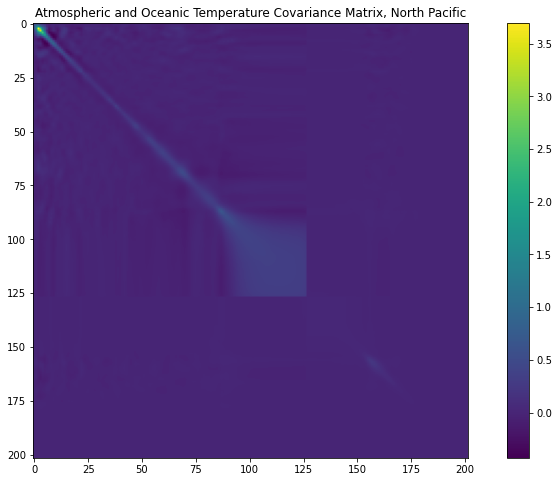

In [84]:
# Plot covariance matrices
this_cov = np_cov
fullname = 'North Pacific'
short_name = 'north_pacific'
plt.imshow(this_cov)
plt.colorbar()
plt.title('Atmospheric and Oceanic Temperature Covariance Matrix, '+fullname)
plt.savefig(plot_dir+'/cov_atm_ocn_temperature_'+short_name+'.png')

In [25]:
# Load correlation matrices
sp_cor = np.load(my_data_dir +'/south_pacific2_cor.npy')
so_cor = np.load(my_data_dir +'/southern_ocean2_cor.npy')
io_cor = np.load(my_data_dir +'/indian_ocean2_cor.npy')
tp_cor = np.load(my_data_dir +'/tropical_pacific2_cor.npy')
np_cor = np.load(my_data_dir +'/north_pacific_cor.npy')

In [ ]:
# Plot correlation matrices
this_cor = sp_cor
fullname = 'South Pacific'
short_name = 'south_pacific'
plt.imshow(this_cor,  vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()
plt.title('Atmospheric and Oceanic Temperature Correlation Matrix, '+fullname)
plt.savefig(plot_dir+'/cor_atm_ocn_temperature_'+short_name+'.png')

In [ ]:
# Plot correlation matrices
this_cor = so_cor
fullname = 'Southern Ocean'
short_name = 'southern_ocean'
plt.imshow(this_cor,  vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()
plt.title('Atmospheric and Oceanic Temperature Correlation Matrix, '+fullname)
plt.savefig(plot_dir+'/cor_atm_ocn_temperature_'+short_name+'.png')

In [ ]:
# Plot correlation matrices
this_cor = io_cor
fullname = 'Indian Ocean'
short_name = 'indian_ocean'
plt.imshow(this_cor,  vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()
plt.title('Atmospheric and Oceanic Temperature Correlation Matrix, '+fullname)
plt.savefig(plot_dir+'/cor_atm_ocn_temperature_'+short_name+'.png')

In [ ]:
# Plot correlation matrices
this_cor = tp_cor
fullname = 'Tropical Pacific'
short_name = 'tropical_pacific'
plt.imshow(this_cor,  vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()
plt.title('Atmospheric and Oceanic Temperature Correlation Matrix, '+fullname)
plt.savefig(plot_dir+'/cor_atm_ocn_temperature_'+short_name+'.png')

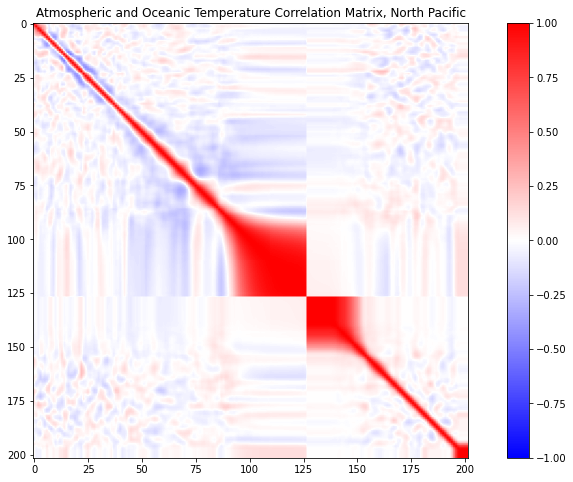

In [85]:
# Plot correlation matrices
this_cor = np_cor
fullname = 'North Pacific'
short_name = 'north_pacific'
plt.imshow(this_cor,  vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()
plt.title('Atmospheric and Oceanic Temperature Correlation Matrix, '+fullname)
plt.savefig(plot_dir+'/cor_atm_ocn_temperature_'+short_name+'.png')

In [27]:
# Plot spread by vertical level in the ocean, to 150 m
sp_spread = np.sqrt(np.diag(sp_cov))
so_spread = np.sqrt(np.diag(so_cov))
io_spread = np.sqrt(np.diag(io_cov))
tp_spread = np.sqrt(np.diag(tp_cov))
np_spread = np.sqrt(np.diag(np_cov))

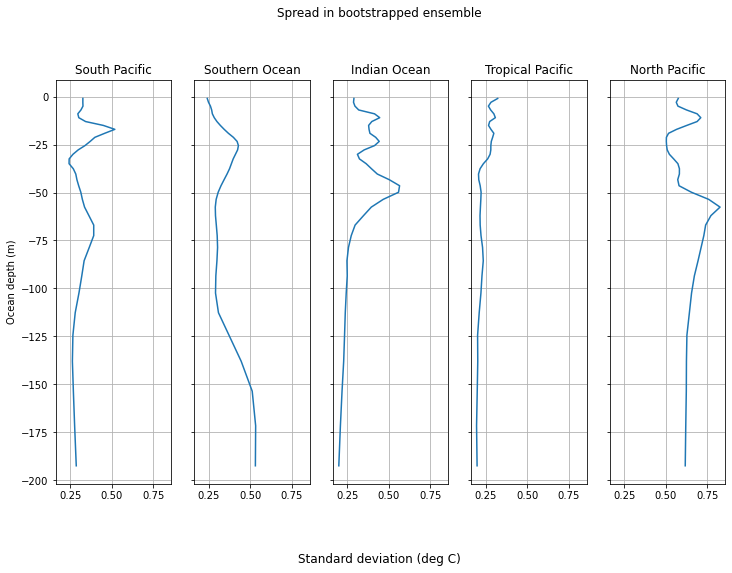

In [28]:
## Create subplots
fig, axs = plt.subplots(ncols=5, sharey=True, sharex=True) 

# Plot ocn temperature
ind0m = len(south_pacific['atm_lev'])
ind150m =  37 
axs[0].plot(sp_spread[ind0m:ind0m+ind150m], -1 * sp_corr['ocn_lev'][:ind150m])
axs[1].plot(so_spread[ind0m:ind0m+ind150m], -1 * so_corr['ocn_lev'][:ind150m])
axs[2].plot(io_spread[ind0m:ind0m+ind150m], -1 * io_corr['ocn_lev'][:ind150m])
axs[3].plot(tp_spread[ind0m:ind0m+ind150m], -1 * tp_corr['ocn_lev'][:ind150m])
axs[4].plot(np_spread[ind0m:ind0m+ind150m], -1 * np_corr['ocn_lev'][:ind150m])

# Set titles
axs[0].set_title('South Pacific')
axs[1].set_title('Southern Ocean')
axs[2].set_title('Indian Ocean')
axs[3].set_title('Tropical Pacific')
axs[4].set_title('North Pacific')

# Adjust and label axes
axs[0].set_ylabel('Ocean depth (m)')
fig.supxlabel('Standard deviation (deg C)')
fig.suptitle('Spread in bootstrapped ensemble')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(3.5)

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/temp_spread_ocn150m_five_columns')
plt.show()

In [38]:
## Plot vertical profiles in atmosphere
## Average over ensemble members and show the mean at each location only

atm_lev = len(south_pacific['atm_lev'])

# South Pacific
sp_atm_temp = south_pacific['atm_T'].mean('ens_mem').to_numpy()
sp_atm_temp = sp_atm_temp.reshape(atm_lev, 25)

# Southern Ocean
so_atm_temp = southern_ocean['atm_T'].mean('ens_mem').to_numpy()
so_atm_temp = so_atm_temp.reshape(atm_lev, 25)

# Indian Ocean
io_atm_temp = indian_ocean['atm_T'].mean('ens_mem').to_numpy()
io_atm_temp = io_atm_temp.reshape(atm_lev, 25)

# Tropical Pacific
tp_atm_temp = tropical_pacific['atm_T'].mean('ens_mem').to_numpy()
tp_atm_temp = tp_atm_temp.reshape(atm_lev, 25)

# North Pacific
np_atm_temp = north_pacific['atm_T'].mean('ens_mem').to_numpy()
np_atm_temp = np_atm_temp.reshape(atm_lev, 25)

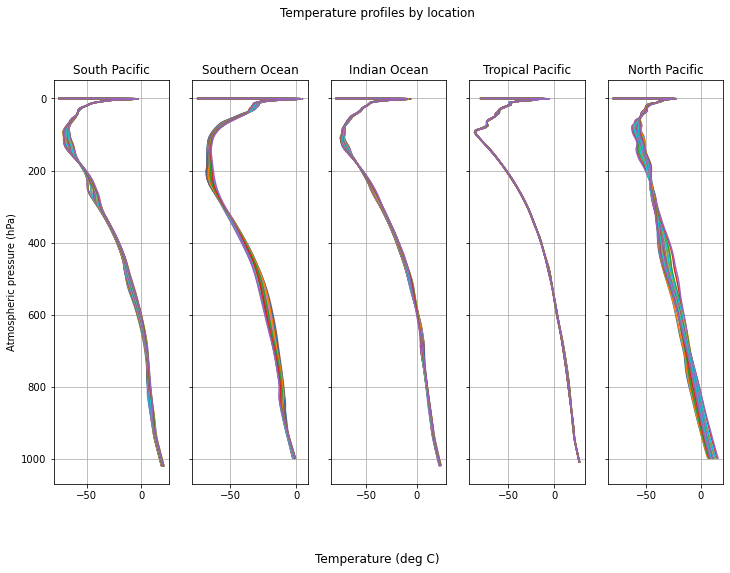

In [40]:
## Create subplots
fig, axs = plt.subplots(ncols=5, sharey=True) 

# Plot atm temperature

axs[0].plot(sp_atm_temp - 273.15, sp_corr['atm_p'])
axs[1].plot(so_atm_temp - 273.15, so_corr['atm_p'])
axs[2].plot(io_atm_temp - 273.15, io_corr['atm_p'])
axs[3].plot(tp_atm_temp - 273.15, tp_corr['atm_p'])
axs[4].plot(np_atm_temp - 273.15, np_corr['atm_p'])

# Set titles
axs[0].set_title('South Pacific')
axs[1].set_title('Southern Ocean')
axs[2].set_title('Indian Ocean')
axs[3].set_title('Tropical Pacific')
axs[4].set_title('North Pacific')

# Adjust and label axes
#axs[0].set_yscale('log')
plt.gca().invert_yaxis()
axs[0].set_ylabel('Atmospheric pressure (hPa)')
fig.supxlabel('Temperature (deg C)')
fig.suptitle('Temperature profiles by location')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(3.5)
    

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/temp_mean_atm_five_columns')
plt.show()

In [41]:
## Plot spread in top 150 m of ocean
## Standard deviation of ensemble

atm_lev = len(south_pacific['atm_lev'])

# South Pacific
sp_atm_temp_std = south_pacific['atm_T'].std('ens_mem').to_numpy()
sp_atm_temp_std = sp_atm_temp_std.reshape(atm_lev, 25)

# Southern Ocean
so_atm_temp_std = southern_ocean['atm_T'].std('ens_mem').to_numpy()
so_atm_temp_std = so_atm_temp_std.reshape(atm_lev, 25)

# Indian Ocean
io_atm_temp_std = indian_ocean['atm_T'].std('ens_mem').to_numpy()
io_atm_temp_std = io_atm_temp_std.reshape(atm_lev, 25)

# Tropical Pacific
tp_atm_temp_std = tropical_pacific['atm_T'].std('ens_mem').to_numpy()
tp_atm_temp_std = tp_atm_temp_std.reshape(atm_lev, 25)

# North Pacific
np_atm_temp_std = north_pacific['atm_T'].std('ens_mem').to_numpy()
np_atm_temp_std = np_atm_temp_std.reshape(atm_lev, 25)

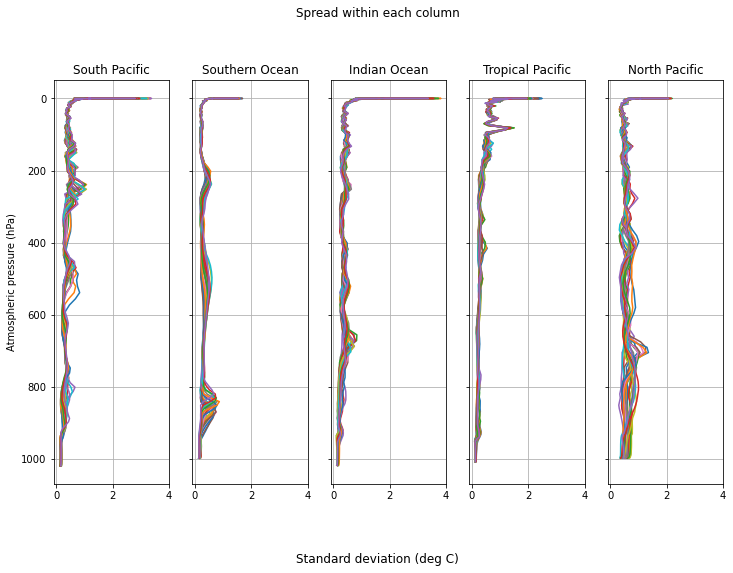

In [42]:
## Create subplots
fig, axs = plt.subplots(ncols=5, sharey=True, sharex=True) 

# Plot atm temperature spread
axs[0].plot(sp_atm_temp_std, sp_corr['atm_p'])
axs[1].plot(so_atm_temp_std, so_corr['atm_p'])
axs[2].plot(io_atm_temp_std, io_corr['atm_p'])
axs[3].plot(tp_atm_temp_std, tp_corr['atm_p'])
axs[4].plot(np_atm_temp_std, np_corr['atm_p'])

# Set titles
axs[0].set_title('South Pacific')
axs[1].set_title('Southern Ocean')
axs[2].set_title('Indian Ocean')
axs[3].set_title('Tropical Pacific')
axs[4].set_title('North Pacific')

# Adjust and label axes
plt.gca().invert_yaxis()
axs[0].set_ylabel('Atmospheric pressure (hPa)')
fig.supxlabel('Standard deviation (deg C)')
fig.suptitle('Spread within each column')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(3.5)

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/temp_std_bycolumn_atm_five_columns')
plt.show()

In [43]:
# Spread in the mean profiles
sp_atm_stdofmean = sp_atm_temp.std(axis=1)
so_atm_stdofmean = so_atm_temp.std(axis=1)
io_atm_stdofmean = io_atm_temp.std(axis=1)
tp_atm_stdofmean = tp_atm_temp.std(axis=1)
np_atm_stdofmean = np_atm_temp.std(axis=1)

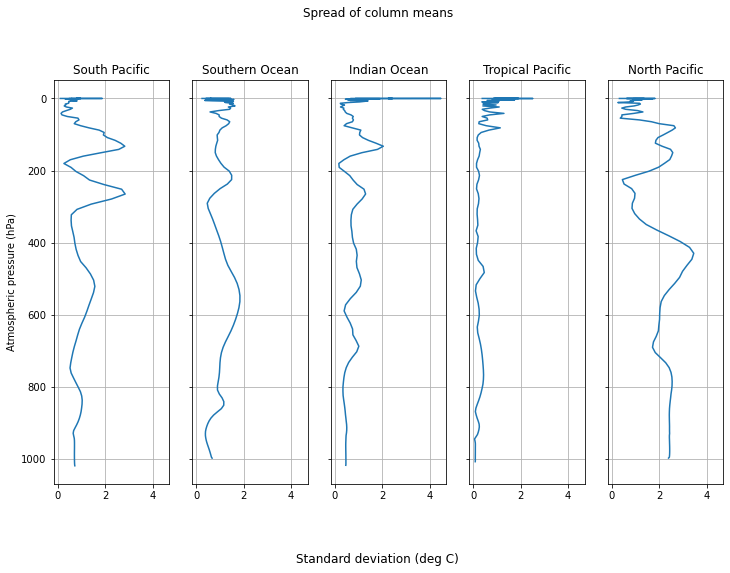

In [44]:
## Create subplots
fig, axs = plt.subplots(ncols=5, sharey=True, sharex=True) 

# Plot atm temperature spread of column means
axs[0].plot(sp_atm_stdofmean, sp_corr['atm_p'])
axs[1].plot(so_atm_stdofmean, so_corr['atm_p'])
axs[2].plot(io_atm_stdofmean, io_corr['atm_p'])
axs[3].plot(tp_atm_stdofmean, tp_corr['atm_p'])
axs[4].plot(np_atm_stdofmean, np_corr['atm_p'])

# Set titles
axs[0].set_title('South Pacific')
axs[1].set_title('Southern Ocean')
axs[2].set_title('Indian Ocean')
axs[3].set_title('Tropical Pacific')
axs[4].set_title('North Pacific')

# Adjust and label axes
plt.gca().invert_yaxis()
axs[0].set_ylabel('Atmospheric pressure (hPa)')
fig.supxlabel('Standard deviation (deg C)')
fig.suptitle('Spread of column means')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(3.5)

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/temp_stdofmean_atm_five_columns')
plt.show()

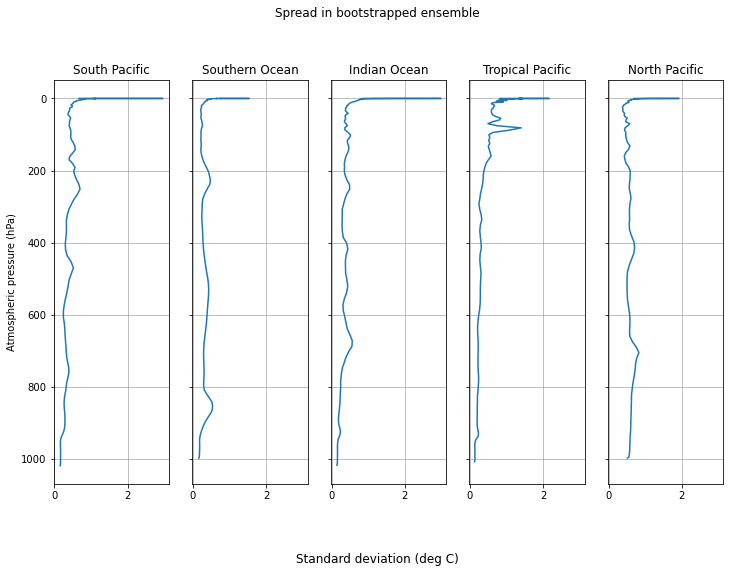

In [46]:
## Create subplots
fig, axs = plt.subplots(ncols=5, sharey=True, sharex=True) 

# Plot ocn temperature
ind0m = len(south_pacific['atm_lev'])
axs[0].plot(sp_spread[:ind0m], sp_corr['atm_p'])
axs[1].plot(so_spread[:ind0m], so_corr['atm_p'])
axs[2].plot(io_spread[:ind0m], io_corr['atm_p'])
axs[3].plot(tp_spread[:ind0m], tp_corr['atm_p'])
axs[4].plot(np_spread[:ind0m], np_corr['atm_p'])

# Set titles
axs[0].set_title('South Pacific')
axs[1].set_title('Southern Ocean')
axs[2].set_title('Indian Ocean')
axs[3].set_title('Tropical Pacific')
axs[4].set_title('North Pacific')

# Adjust and label axes
plt.gca().invert_yaxis()
axs[0].set_ylabel('Atmospheric pressure (hPa)')
fig.supxlabel('Standard deviation (deg C)')
fig.suptitle('Spread in bootstrapped ensemble')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(3.5)

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/temp_spread_atm_five_columns')
plt.show()

In [47]:
## Check to see if southern ocean is freshwater lens generated from ice melt 
## that creates a shallow barrier layer on the surface which makes the ocean more responsive
## to atm perts
so_salt_mean = southern_ocean['ocn_Salt'].sel(lon=45.5, lat=-59.5).mean(['ens_mem'])
so_temp_mean = southern_ocean['ocn_Temp'].sel(lon=45.5, lat=-59.5).mean(['ens_mem'])
southern_ocean['ocn_Dens'] = dens_wright_eos(southern_ocean['ocn_Temp'], southern_ocean['ocn_Salt'], 0)
so_dens_mean = southern_ocean['ocn_Dens'].sel(lon=45.5, lat=-59.5).mean(['ens_mem'])

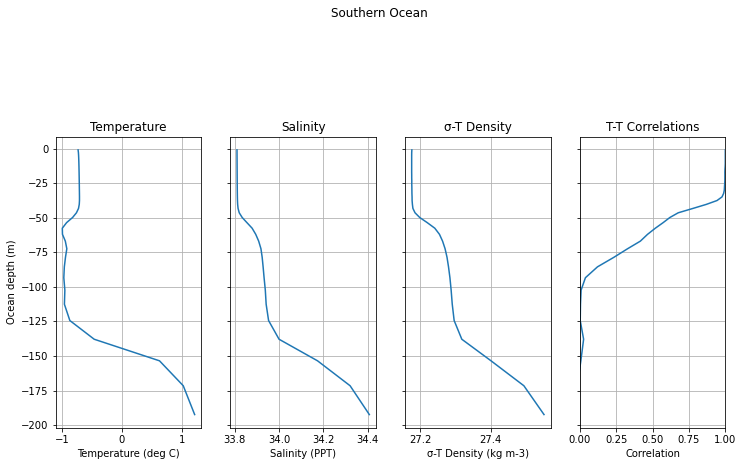

In [48]:
## Create subplots
fig, axs = plt.subplots(ncols=4, sharey=True) 

# Plot ocn states
ind150m =  37
axs[0].plot(so_temp_mean[:ind150m], -1 * sp_corr['ocn_lev'][:ind150m])
axs[1].plot(so_salt_mean[:ind150m], -1 * so_corr['ocn_lev'][:ind150m])
axs[2].plot(so_dens_mean[:ind150m]-1000, -1 * so_corr['ocn_lev'][:ind150m])
axs[3].plot(so_corr['sst_ocn_T'][:ind150m], -1 * io_corr['ocn_lev'][:ind150m])


# Set titles
axs[0].set_title('Temperature')
axs[1].set_title('Salinity')
axs[2].set_title('\u03C3-T Density')
axs[3].set_title('T-T Correlations')


# Adjust and label axes
axs[0].set_ylabel('Ocean depth (m)')
axs[0].set_xlabel('Temperature (deg C)')
axs[1].set_xlabel('Salinity (PPT)')
axs[2].set_xlabel('\u03C3-T Density (kg m-3)')
axs[3].set_xlabel('Correlation')
axs[3].set_xlim([0,1])
fig.suptitle('Southern Ocean')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(2)

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/southern_ocean_temp_salt_dens_corr')
plt.show()

In [53]:
## South Pacific
sp_corr = xr.Dataset()
sp_corr['ast_atm_T'] = xr.corr(south_pacific['atm_t2m'], south_pacific['atm_T'], dim = 'ens_mem')
sp_corr['ast_ocn_T'] = xr.corr(south_pacific['atm_t2m'], south_pacific['ocn_Temp'], dim = 'ens_mem')
sp_corr['atm_p'] = south_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
sp_corr = sp_corr.mean(['lat', 'lon'])

## Southern Ocean
so_corr = xr.Dataset()
so_corr['ast_atm_T'] = xr.corr(southern_ocean['atm_t2m'], southern_ocean['atm_T'], dim = 'ens_mem')
so_corr['ast_ocn_T'] = xr.corr(southern_ocean['atm_t2m'], southern_ocean['ocn_Temp'], dim = 'ens_mem')
so_corr['atm_p'] = southern_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
so_corr = so_corr.mean(['lat', 'lon'])

## Indian Ocean
io_corr = xr.Dataset()
io_corr['ast_atm_T'] = xr.corr(indian_ocean['atm_t2m'], indian_ocean['atm_T'], dim = 'ens_mem')
io_corr['ast_ocn_T'] = xr.corr(indian_ocean['atm_t2m'], indian_ocean['ocn_Temp'], dim = 'ens_mem')
io_corr['atm_p'] = indian_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
io_corr = io_corr.mean(['lat', 'lon'])

## Tropical Pacific
tp_corr = xr.Dataset()
tp_corr['ast_atm_T'] = xr.corr(tropical_pacific['atm_t2m'], tropical_pacific['atm_T'], dim = 'ens_mem')
tp_corr['ast_ocn_T'] = xr.corr(tropical_pacific['atm_t2m'], tropical_pacific['ocn_Temp'], dim = 'ens_mem')
tp_corr['atm_p'] = tropical_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
tp_corr = tp_corr.mean(['lat', 'lon'])

## North Pacific
np_corr = xr.Dataset()
np_corr['ast_atm_T'] = xr.corr(north_pacific['atm_t2m'], north_pacific['atm_T'], dim = 'ens_mem')
np_corr['ast_ocn_T'] = xr.corr(north_pacific['atm_t2m'], north_pacific['ocn_Temp'], dim = 'ens_mem')
np_corr['atm_p'] = north_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
np_corr = np_corr.mean(['lat', 'lon'])

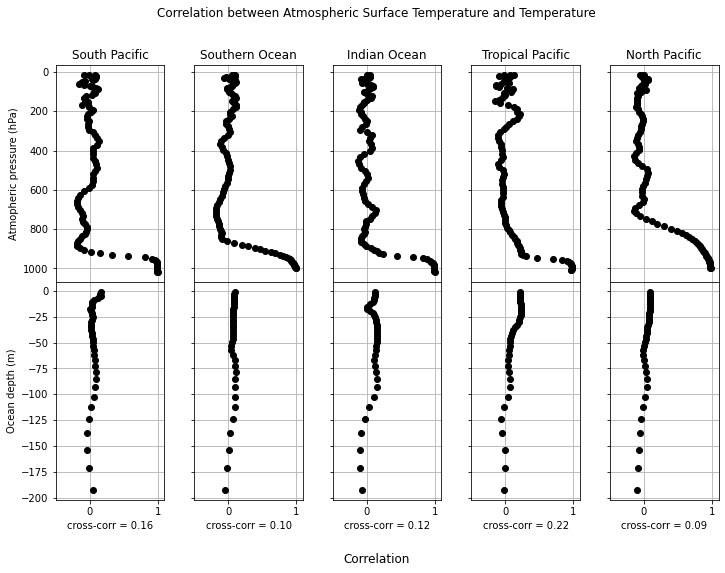

In [54]:
## Create subplots
fig, axs = plt.subplots(nrows=2, ncols=5, sharex=True, sharey='row') 

# Plot atm correlations
axs[0, 0].plot(sp_corr['ast_atm_T'][23:], sp_corr['atm_p'][23:], 'ko')
axs[0, 1].plot(so_corr['ast_atm_T'][23:], so_corr['atm_p'][23:], 'ko')
axs[0, 2].plot(io_corr['ast_atm_T'][23:], io_corr['atm_p'][23:], 'ko')
axs[0, 3].plot(tp_corr['ast_atm_T'][23:], tp_corr['atm_p'][23:], 'ko')
axs[0, 4].plot(np_corr['ast_atm_T'][23:], np_corr['atm_p'][23:], 'ko')

# Plot ocn correlations
axs[1, 0].plot(sp_corr['ast_ocn_T'][:37], -1 * sp_corr['ocn_lev'][:37], 'ko')
axs[1, 1].plot(so_corr['ast_ocn_T'][:37], -1 * so_corr['ocn_lev'][:37], 'ko')
axs[1, 2].plot(io_corr['ast_ocn_T'][:37], -1 * io_corr['ocn_lev'][:37], 'ko')
axs[1, 3].plot(tp_corr['ast_ocn_T'][:37], -1 * tp_corr['ocn_lev'][:37], 'ko')
axs[1, 4].plot(np_corr['ast_ocn_T'][:37], -1 * np_corr['ocn_lev'][:37], 'ko')

# Set titles
axs[0,0].set_title('South Pacific')
axs[0,1].set_title('Southern Ocean')
axs[0,2].set_title('Indian Ocean')
axs[0,3].set_title('Tropical Pacific')
axs[0,4].set_title('North Pacific')

# Add correlation
axs[1,0].set_xlabel('cross-corr = '+str('%.2f'%sp_corr['ast_ocn_T'][0].values))
axs[1,1].set_xlabel('cross-corr = '+str('%.2f'%so_corr['ast_ocn_T'][0].values))
axs[1,2].set_xlabel('cross-corr = '+str('%.2f'%io_corr['ast_ocn_T'][0].values))
axs[1,3].set_xlabel('cross-corr = '+str('%.2f'%tp_corr['ast_ocn_T'][0].values))
axs[1,4].set_xlabel('cross-corr = '+str('%.2f'%np_corr['ast_ocn_T'][0].values))

# Adjust axes
axs[0, 0].invert_yaxis()
#axs[0, 0].set_yscale('log')
#axs[1, 0].set_yscale('symlog')

# Adjust and label axes
axs[0, 0].set_xlim([-0.5, 1.1])
axs[0, 0].set_ylabel('Atmopheric pressure (hPa)')
axs[1, 0].set_ylabel('Ocean depth (m)')
fig.supxlabel('Correlation')
fig.suptitle('Correlation between Atmospheric Surface Temperature and Temperature')

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(2)

plt.rcParams['figure.figsize'] = [12,8]
plt.savefig(plot_dir+'/ast_temp_corr_five_columns')
plt.show()

In [55]:
io = xr.Dataset()
io['atm_p'] = indian_ocean['atm_delp'].sel(lon=75.5, lat=-24.5).mean('ens_mem').cumsum(dim='atm_lev') / 1e2
io['atm_z'] = indian_ocean['atm_DZ'].sel(lon=75.5, lat=-24.5).mean('ens_mem').cumsum(dim='atm_lev')

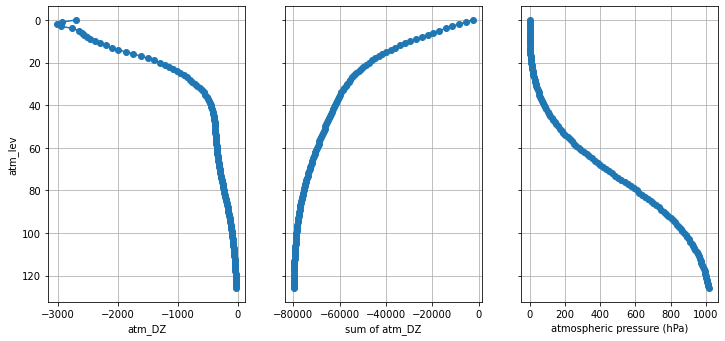

In [56]:
## Create subplots
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True) 

# plot 
axs[0].plot(indian_ocean['atm_DZ'].sel(lon=75.5, lat=-24.5).mean('ens_mem'), indian_ocean['atm_lev'], '-o')
axs[1].plot(indian_ocean['atm_DZ'].sel(lon=75.5, lat=-24.5).mean('ens_mem').cumsum('atm_lev'), indian_ocean['atm_lev'], '-o')
axs[2].plot(io['atm_p'], indian_ocean['atm_lev'], '-o')

# set labels
axs[0].invert_yaxis()
axs[0].set_ylabel('atm_lev')
axs[0].set_xlabel('atm_DZ')
axs[1].set_xlabel('sum of atm_DZ')
axs[2].set_xlabel('atmospheric pressure (hPa)')

plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(1.5)

# Save
plt.rcParams['figure.figsize'] = [14,8]
plt.savefig(plot_dir+'/atm_DZ')
plt.show()